Дан массив данных
𝑋 = 𝑛𝑝. 𝑎𝑟𝑟𝑎𝑦([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91],])
Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

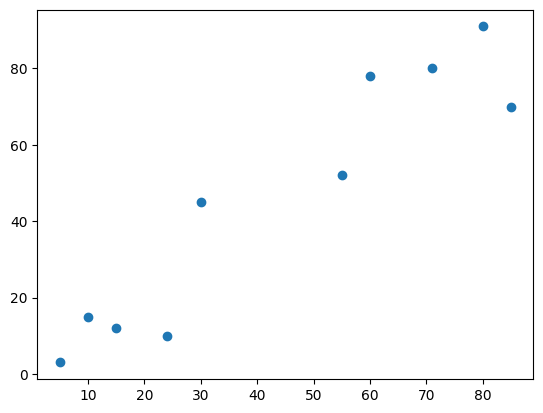

In [ ]:
x = np.array([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91],])

plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_means = kmeans.predict(x)

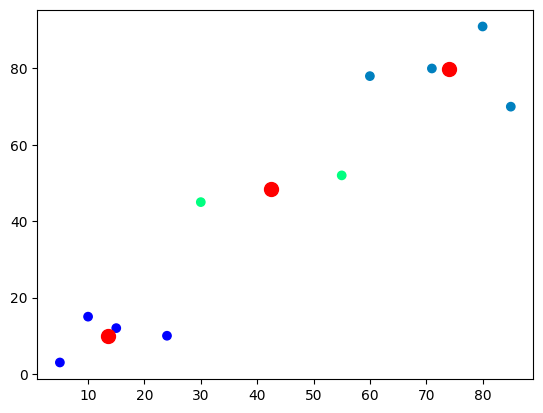

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y_means, cmap='winter')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c='r', s=100)
plt.show()

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split

iris = sns.load_dataset('iris')
iris_x, iris_y = iris.iloc[:, :-1], iris.iloc[:, -1]
# iris.iloc[:, -1] = iris.iloc[:, -1].map({'setosa': 0, 'virginica': 1, 'versicolor': 2})
iris_x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris_means = KMeans(n_clusters=4)
iris_y_means = iris_means.fit_predict(iris_x)

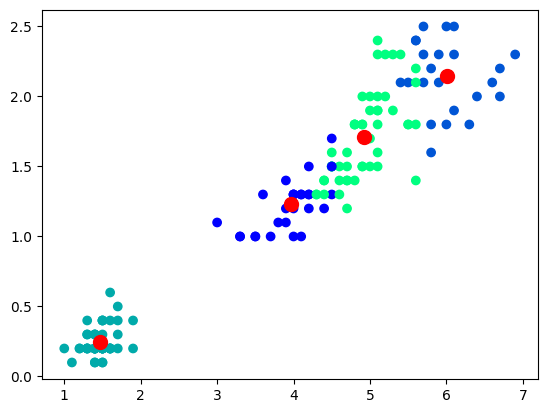

array([[5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [7.08695652, 3.12608696, 6.01304348, 2.14347826],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.29183673, 2.8877551 , 4.92653061, 1.7122449 ]])

In [ ]:
plt.scatter(iris_x['petal_length'], iris_x['petal_width'], c=iris_y_means, cmap='winter')
centers = iris_means.cluster_centers_
plt.scatter(centers[:,2], centers[:, 3], c='r', s=100)
plt.show()
centers

Задание. Выполните иерархическую кластеризацию для набора данных об
ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')
iris_x, iris_y = iris.iloc[:, :-1], iris.iloc[:, -1]
iris_x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


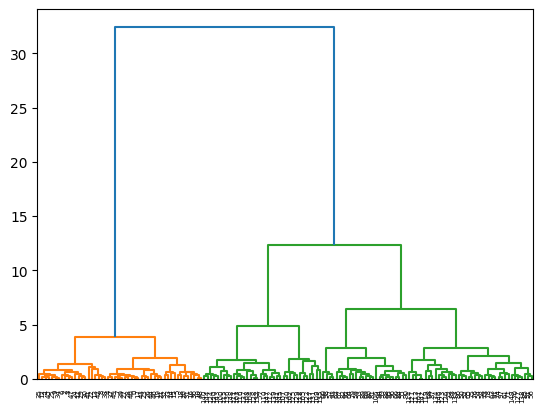

In [ ]:
import scipy.cluster.hierarchy as shc
# plt.figure(figsize=(28, 12), dpi=180)
# plt.figure(fig)
dend = shc.dendrogram(shc.linkage(iris_x, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
data = cluster.fit_predict(iris_x)
data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [ ]:
iris_x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


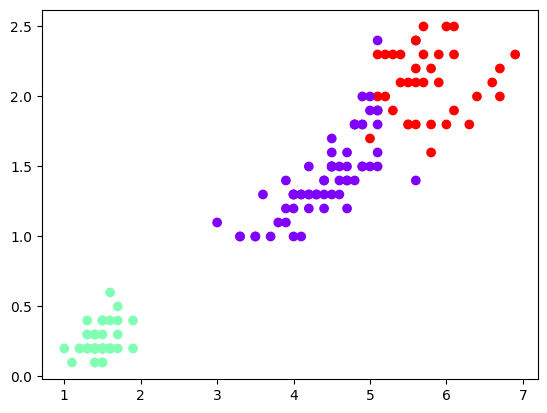

In [ ]:
plt.scatter(iris_x['petal_length'], iris_x['petal_width'], c=cluster.labels_, cmap='rainbow')